In [0]:
# Install the PyDrive wrapper & import libraries 
! pip install -U -q PyDrive 

from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 21.6MB/s 


In [0]:
download = drive.CreateFile({'id': '1_WqUew2CdIfAY2oPh7kOZqgtXDtLa6CN'})
download.GetContentFile('train_HNzkrPW.zip')

!unzip train_HNzkrPW.zip

In [0]:
#https://drive.google.com/open?id=1xCoxZFAkskZ2TLXIn_VkyTRuHGltFIOZ
  
download1 = drive.CreateFile({'id': '1xCoxZFAkskZ2TLXIn_VkyTRuHGltFIOZ'})
download1.GetContentFile('test_CF.csv')

In [0]:
!ls


adc.json	image_data   test_CF.csv  train.csv
bbox_train.csv	sample_data  test_CF.zip  train_HNzkrPW.zip


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import os 
import cv2 
import random

In [0]:
bbox_train_df = pd.read_csv('bbox_train.csv')

In [0]:
bbox_train_df.head(1)

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235


In [0]:
test_df = pd.read_csv('test_CF.csv')
test_df.head(1)

,Name
0,10005.jpg


In [0]:
train_df = pd.read_csv('train.csv')
train_df.head(1)

,Name,HeadCount
0,10001.jpg,4


In [0]:
train_df['HeadCount'].unique()

array([ 4,  2,  3,  6,  7,  8,  5, 11,  1,  9, 10, 21, 13, 14, 15, 17, 12,
       20, 16, 18, 31, 23, 24, 77, 28, 22, 19, 25, 29])

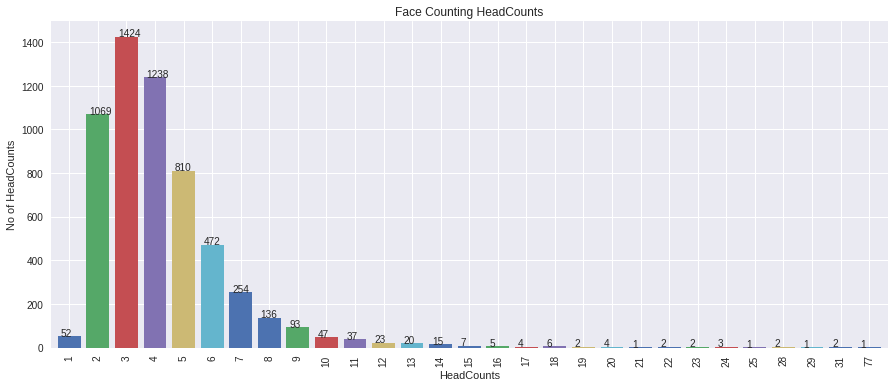

In [0]:
# Number of Images per Head Count 
ax = plt.subplots(figsize = (15, 6))
ax = train_df['HeadCount'].value_counts().sort_index().plot(kind = 'bar', width = .8)
ax.set_ylabel('No of HeadCounts')
ax.set_xlabel("HeadCounts")
ax.set_title("Face Counting HeadCounts")
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2.0))
plt.show()

In [0]:
!ls

adc.json	image_data   test_CF.csv  train.csv
bbox_train.csv	sample_data  test_CF.zip  train_HNzkrPW.zip


In [0]:
n_images = os.listdir('image_data')

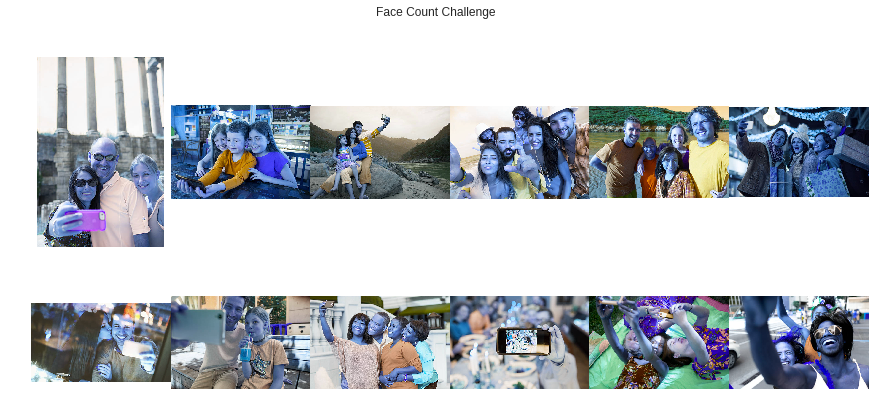

In [0]:
# Sample Images 
sample_images = random.sample(n_images, 12)
f, ax = plt.subplots(2, 6, figsize = (15, 7))

for i in range(0, 12):
  im = cv2.imread('image_data/'+sample_images[i])
  ax[i//6, i%6].imshow(im)
  ax[i//6, i%6].axis('off')
  #print(i//6, i%6)
f.suptitle('Face Count Challenge')
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()


**Model**

In [0]:
# importing Libraries 
